In [3]:
from keras.datasets import reuters

In [8]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt

In [21]:
from keras.utils import to_categorical

In [27]:
from keras.models import Sequential

In [31]:
from keras.layers import Dense

In [4]:
vocab_size = 10000

In [5]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size)

2113536/2110848 [==============================] - 3s 1us/step


In [6]:
X_train.shape

(8982,)

In [15]:
def vectorize(X):
    vectors = np.zeros((len(X), vocab_size))
    for i, x in enumerate(X):
        vectors[i][x] = 1
    return vectors

In [16]:
X_train = vectorize(X_train)

In [17]:
X_train.shape

(8982, 10000)

In [18]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
X_test = vectorize(X_test)

In [20]:
X_test.shape

(2246, 10000)

In [22]:
y_train.shape

(8982,)

In [23]:
y_train = to_categorical(y_train)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(2246, 46)

In [26]:
y_train.shape

(8982, 46)

In [28]:
num_classes = y_train.shape[-1]

In [48]:
model = Sequential()

In [49]:
model.add(Dense(64, activation="relu", input_shape=(vocab_size,)))

In [50]:
model.add(Dense(num_classes, activation="softmax"))

In [51]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100, batch_size=1024)

Train on 8982 samples, validate on 2246 samples
Epoch 1/100
8982/8982 [==============================] - 2s 201us/step - loss: 3.4392 - acc: 0.4075 - val_loss: 2.9403 - val_acc: 0.5107
Epoch 2/100
8982/8982 [==============================] - 1s 142us/step - loss: 2.5294 - acc: 0.5762 - val_loss: 2.2243 - val_acc: 0.6153
Epoch 3/100
8982/8982 [==============================] - 1s 141us/step - loss: 1.8766 - acc: 0.6647 - val_loss: 1.7744 - val_acc: 0.6536
Epoch 4/100
8982/8982 [==============================] - 1s 142us/step - loss: 1.4466 - acc: 0.7109 - val_loss: 1.4872 - val_acc: 0.6999
Epoch 5/100
8982/8982 [==============================] - 1s 141us/step - loss: 1.1656 - acc: 0.7678 - val_loss: 1.3148 - val_acc: 0.7293
Epoch 6/100
8982/8982 [==============================] - 1s 141us/step - loss: 0.9752 - acc: 0.8073 - val_loss: 1.2023 - val_acc: 0.7462
Epoch 7/100
8982/8982 [==============================] - 1s 137us/step - loss: 0.8342 - acc: 0.8353 - val_loss: 1.1219 - val_acc: 

8982/8982 [==============================] - 1s 160us/step - loss: 0.0715 - acc: 0.9619 - val_loss: 1.0351 - val_acc: 0.8059
Epoch 61/100
8982/8982 [==============================] - 1s 144us/step - loss: 0.0718 - acc: 0.9610 - val_loss: 1.0382 - val_acc: 0.8054
Epoch 62/100
8982/8982 [==============================] - 1s 141us/step - loss: 0.0707 - acc: 0.9613 - val_loss: 1.0417 - val_acc: 0.8041
Epoch 63/100
8982/8982 [==============================] - 1s 141us/step - loss: 0.0710 - acc: 0.9627 - val_loss: 1.0476 - val_acc: 0.8045
Epoch 64/100
8982/8982 [==============================] - 1s 141us/step - loss: 0.0718 - acc: 0.9606 - val_loss: 1.0451 - val_acc: 0.8041
Epoch 65/100
8982/8982 [==============================] - 1s 142us/step - loss: 0.0702 - acc: 0.9620 - val_loss: 1.0515 - val_acc: 0.8045
Epoch 66/100
8982/8982 [==============================] - 1s 139us/step - loss: 0.0703 - acc: 0.9629 - val_loss: 1.0540 - val_acc: 0.8050
Epoch 67/100
8982/8982 [=======================

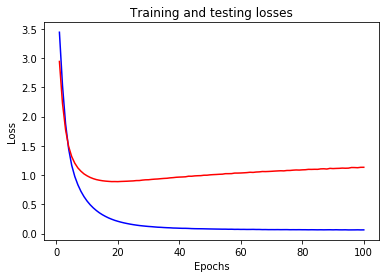

In [55]:
epochs = [i for i in range(1, len(history.history["loss"]) + 1)]
plt.plot(epochs, history.history["loss"], "b", label="Training Loss")
plt.plot(epochs, history.history["val_loss"], "r", label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and testing losses")
plt.show()

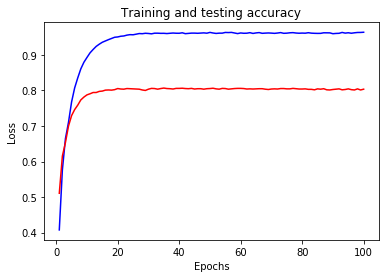

In [56]:
plt.plot(epochs, history.history["acc"], "b", label="Training Acc")
plt.plot(epochs, history.history["val_acc"], "r", label="Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and testing accuracy")
plt.show()